In [36]:
#Aqui importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statistics
import numpy
from scipy.stats import t
import math
import plotly.graph_objs as go

In [37]:
#Cargamos los datos de cleveland para enferemedades cardiacas que se encuentran en el repositorio de 
#https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
heart_disease=pd.read_csv("processed.cleveland.data", names=["EDAD","SEXO","DOLOR_PECHO","PRESION_SAN","COLESTEROL","AZUCAR_SAN",
                                                            "RES_ELECT","MAX_HEART_R","EXERCISE_IND_ANG","ST_EXERC_REPOSO",
                                                            "PENDIENTE","NUMBER_MV_F","THAL",
                                                            "ENFERMEDAD_CARD"],na_values='?')
heart_disease

,EDAD,SEXO,DOLOR_PECHO,PRESION_SAN,COLESTEROL,AZUCAR_SAN,RES_ELECT,MAX_HEART_R,EXERCISE_IND_ANG,ST_EXERC_REPOSO,PENDIENTE,NUMBER_MV_F,THAL,ENFERMEDAD_CARD
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


A continuación se da una somera descripcion de las variables del dataframe
1. EDAD: Edad del paciente en años
2. SEXO: 1 hombre, 0 mujer
3. DOLOR_PECHO: Tipo de dolor en el pecho; 1 Angina tipica, 2 Angina no tipica, 3, dolor no anginal, 4 asintomatico
4. PRESION_SANG: Presion sanguinea (mm HG al llegar al hospital)
5. COLESTEROL: serum colesterol en mg/dl
6. AZUCAR_SANG: 1 si >120mg/dl, 0 d.l.c
7. RES_ELECTC: 0 si normal, 1 si existe una anormalidad en la onda, 2 showing probable or definite left ventricular hypertrophy by Estes' criteria
8. MAX_HERT_R
9. EXERCISE_IND_ANG: 1 si se induce, 0 si no
10. ST_EXERC_REPOSO: ST depression induced by exercise relative to rest
11. PENDIENTE: slope: the slope of the peak exercise ST segment, 1 upslopging, 2 flat, 3 downsloping
12. NUMBER_MV_F: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

In [38]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              303 non-null    float64
 1   SEXO              303 non-null    float64
 2   DOLOR_PECHO       303 non-null    float64
 3   PRESION_SAN       303 non-null    float64
 4   COLESTEROL        303 non-null    float64
 5   AZUCAR_SAN        303 non-null    float64
 6   RES_ELECT         303 non-null    float64
 7   MAX_HEART_R       303 non-null    float64
 8   EXERCISE_IND_ANG  303 non-null    float64
 9   ST_EXERC_REPOSO   303 non-null    float64
 10  PENDIENTE         303 non-null    float64
 11  NUMBER_MV_F       299 non-null    float64
 12  THAL              301 non-null    float64
 13  ENFERMEDAD_CARD   303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Podemos ver que todos los datos son tipo float. Procedemos a convertir las variables convenientes a categoricas

In [39]:
heart_disease.SEXO=heart_disease.SEXO.astype("category")
heart_disease.DOLOR_PECHO=heart_disease.DOLOR_PECHO.astype("category")
heart_disease.AZUCAR_SAN=heart_disease.AZUCAR_SAN.astype("category")
heart_disease.RES_ELECT=heart_disease.RES_ELECT.astype("category")
heart_disease.EXERCISE_IND_ANG=heart_disease.EXERCISE_IND_ANG.astype("category")
heart_disease.PENDIENTE=heart_disease.PENDIENTE.astype("category")
heart_disease.THAL=heart_disease.THAL.astype("category")

In [40]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   EDAD              303 non-null    float64 
 1   SEXO              303 non-null    category
 2   DOLOR_PECHO       303 non-null    category
 3   PRESION_SAN       303 non-null    float64 
 4   COLESTEROL        303 non-null    float64 
 5   AZUCAR_SAN        303 non-null    category
 6   RES_ELECT         303 non-null    category
 7   MAX_HEART_R       303 non-null    float64 
 8   EXERCISE_IND_ANG  303 non-null    category
 9   ST_EXERC_REPOSO   303 non-null    float64 
 10  PENDIENTE         303 non-null    category
 11  NUMBER_MV_F       299 non-null    float64 
 12  THAL              301 non-null    category
 13  ENFERMEDAD_CARD   303 non-null    int64   
dtypes: category(7), float64(6), int64(1)
memory usage: 19.7 KB


Se puede ver que algunas columnas tienen valores null. Procedemos a eliminar las correspondientes filas

In [41]:
heart_disease=heart_disease.dropna()
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   EDAD              297 non-null    float64 
 1   SEXO              297 non-null    category
 2   DOLOR_PECHO       297 non-null    category
 3   PRESION_SAN       297 non-null    float64 
 4   COLESTEROL        297 non-null    float64 
 5   AZUCAR_SAN        297 non-null    category
 6   RES_ELECT         297 non-null    category
 7   MAX_HEART_R       297 non-null    float64 
 8   EXERCISE_IND_ANG  297 non-null    category
 9   ST_EXERC_REPOSO   297 non-null    float64 
 10  PENDIENTE         297 non-null    category
 11  NUMBER_MV_F       297 non-null    float64 
 12  THAL              297 non-null    category
 13  ENFERMEDAD_CARD   297 non-null    int64   
dtypes: category(7), float64(6), int64(1)
memory usage: 21.5 KB


In [42]:
heart_disease.describe()

,EDAD,PRESION_SAN,COLESTEROL,MAX_HEART_R,ST_EXERC_REPOSO,NUMBER_MV_F,ENFERMEDAD_CARD
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.946128
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,1.234551
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


Como se puede ver, la varaible ENFERMEDAD_CARD toma valores de 0, 1, 2, 3 y 4; en este caso 0 representa ausencia de enfermadad,
y 1,2,3 y 4 representa presencia. A continuación convertimos estos datos a valores binarios 0, para ausencia, 1 para presencia

In [43]:
heart_disease.ENFERMEDAD_CARD=heart_disease.ENFERMEDAD_CARD.apply(lambda number: 0 if number==0 else 1)
heart_disease

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12916\4224179879.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,EDAD,SEXO,DOLOR_PECHO,PRESION_SAN,COLESTEROL,AZUCAR_SAN,RES_ELECT,MAX_HEART_R,EXERCISE_IND_ANG,ST_EXERC_REPOSO,PENDIENTE,NUMBER_MV_F,THAL,ENFERMEDAD_CARD
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12916\2464295556.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



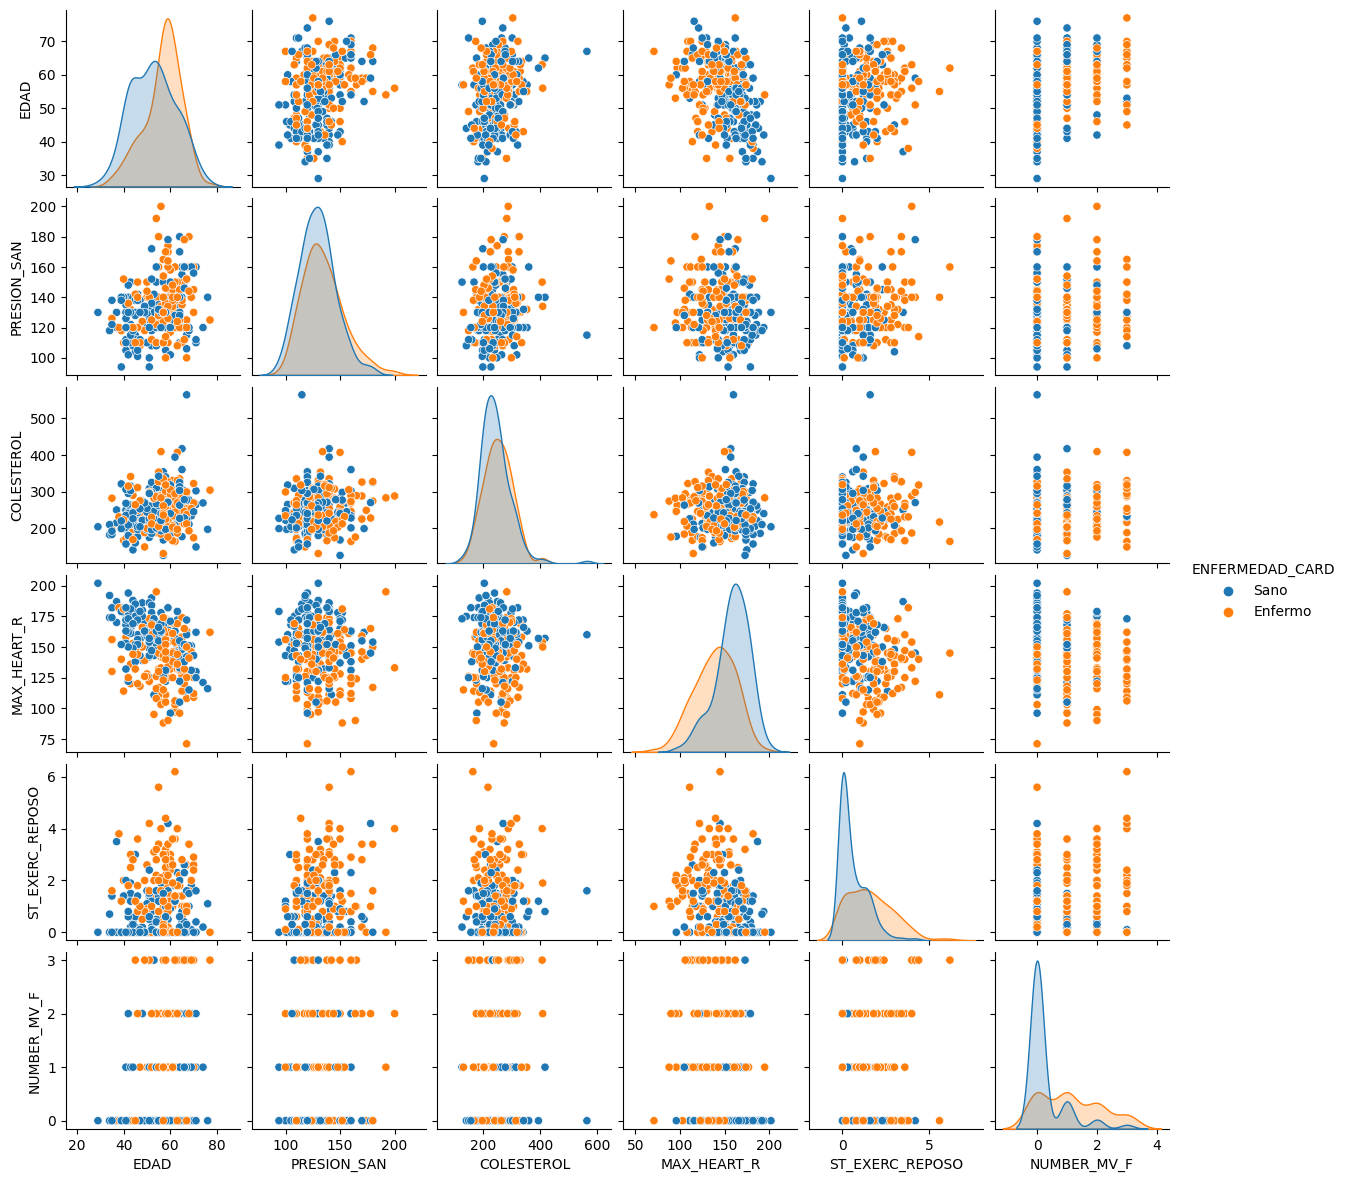

In [44]:

heart_disease_mod=heart_disease
heart_disease_mod.ENFERMEDAD_CARD=heart_disease_mod.ENFERMEDAD_CARD.apply(lambda num: "Sano" if num==0 else "Enfermo")
sns.pairplot(heart_disease_mod,height=2,hue="ENFERMEDAD_CARD")


Exploremos los box-plot de cada variable numerica vs la variable enfermedad cardiaca

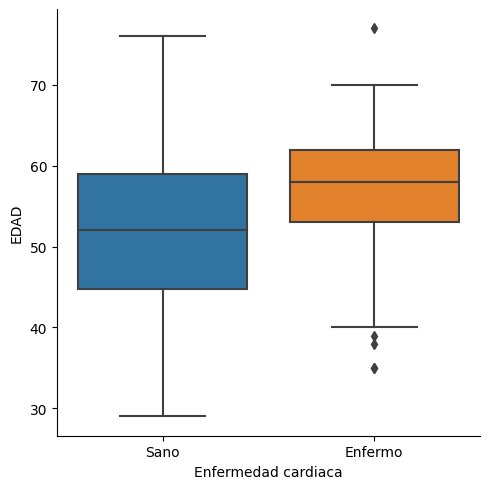

In [45]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="EDAD", kind="box")
fig.set(xlabel="Enfermedad cardiaca")

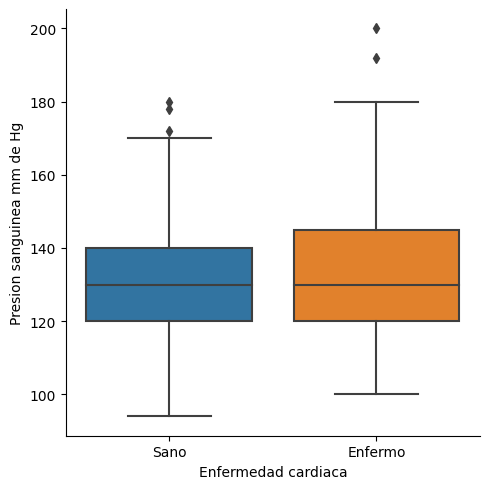

In [46]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="PRESION_SAN", kind="box")
fig.set(ylabel="Presion sanguinea mm de Hg")
fig.set(xlabel="Enfermedad cardiaca")

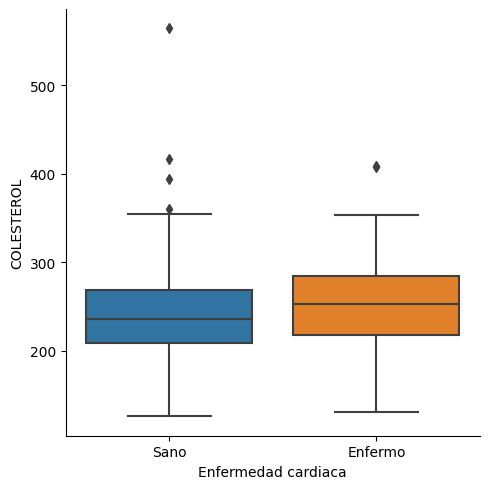

In [47]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="COLESTEROL", kind="box")
fig.set(xlabel="Enfermedad cardiaca")

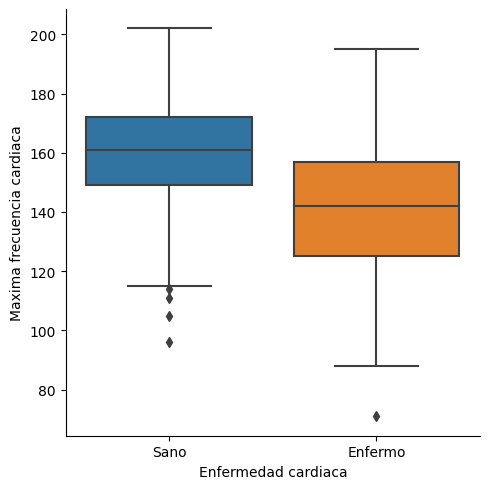

In [48]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="MAX_HEART_R", kind="box")
fig.set(ylabel="Maxima frecuencia cardiaca")
fig.set(xlabel="Enfermedad cardiaca")

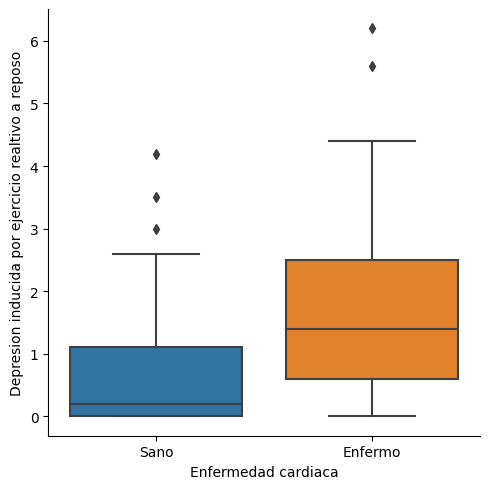

In [49]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="ST_EXERC_REPOSO", kind="box")
fig.set(ylabel="Depresion inducida por ejercicio realtivo a reposo")
fig.set(xlabel="Enfermedad cardiaca")

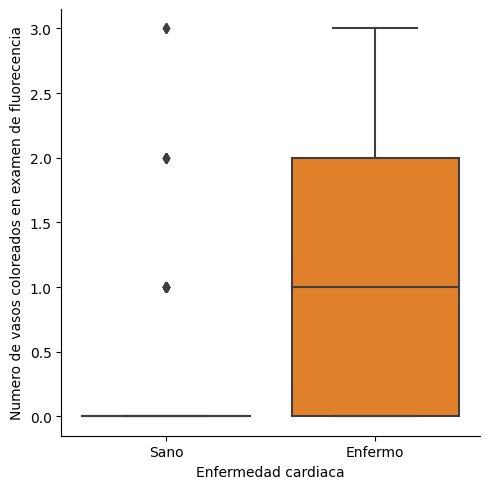

In [50]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="NUMBER_MV_F", kind="box")
fig.set(ylabel="Numero de vasos coloreados en examen de fluorecencia")
fig.set(xlabel="Enfermedad cardiaca")

Estudiemos ahora algunas variables categoricas

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos y sanos segun el sexo')]

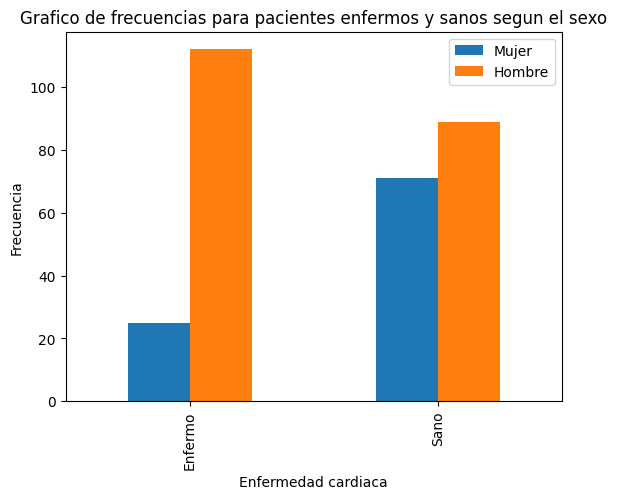

In [51]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["SEXO"]).plot(kind="bar")
ax.legend(["Mujer","Hombre"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="Grafico de frecuencias para pacientes enfermos y sanos segun el sexo")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \ny sanos segun el tipo de dolor en el pecho')]

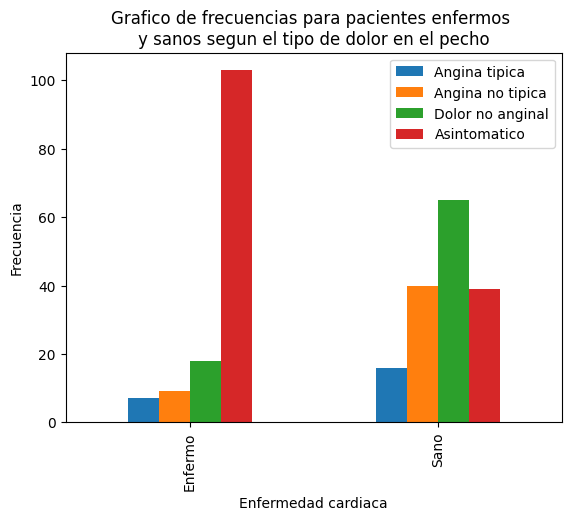

In [52]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["DOLOR_PECHO"]).plot(kind="bar")
ax.legend(["Angina tipica","Angina no tipica","Dolor no anginal","Asintomatico"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
y sanos segun el tipo de dolor en el pecho""")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \ny sanos segun su nivel de azucar')]

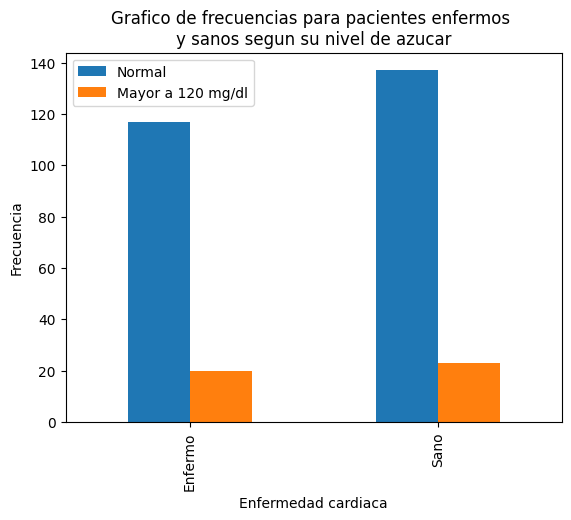

In [53]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["AZUCAR_SAN"]).plot(kind="bar")
ax.legend(["Normal","Mayor a 120 mg/dl"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
y sanos segun su nivel de azucar""")


[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos\ny sanos segun su electrocardiograma')]

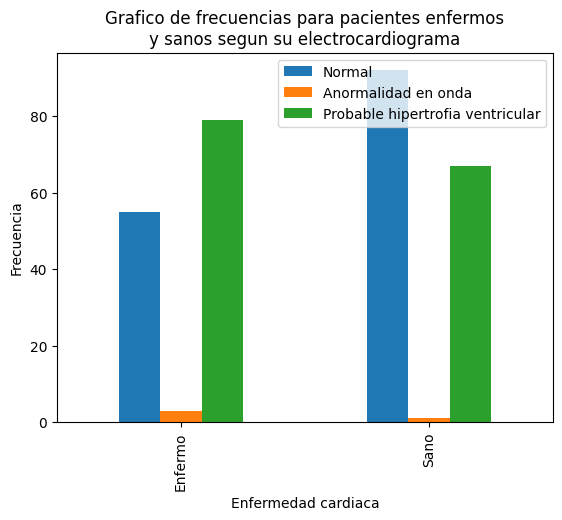

In [54]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["RES_ELECT"]).plot(kind="bar")
ax.legend(["Normal","Anormalidad en onda","Probable hipertrofia ventricular"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos
y sanos segun su electrocardiograma""")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \ny sanos segun si presentan angina inducida por ejercicio')]

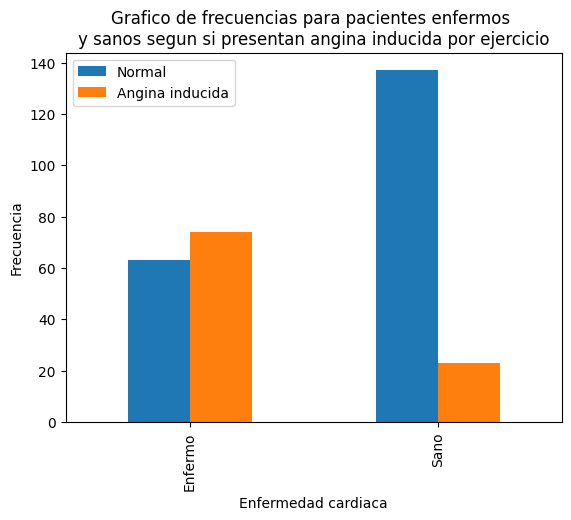

In [55]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["EXERCISE_IND_ANG"]).plot(kind="bar")
ax.legend(["Normal","Angina inducida"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
y sanos segun si presentan angina inducida por ejercicio""")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \ny sanos segun la pendiente de pico de ejercicio ST')]

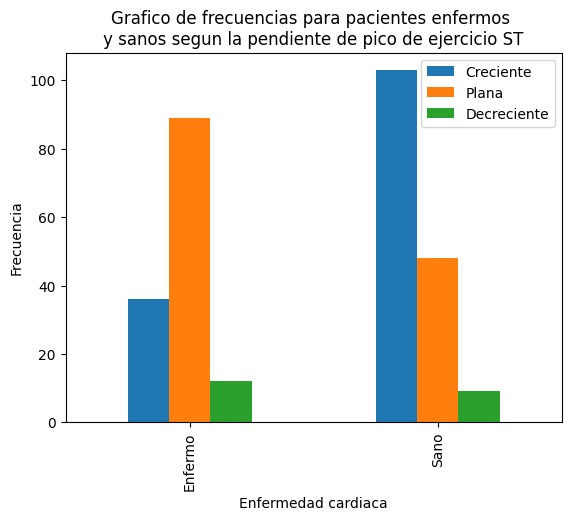

In [56]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["PENDIENTE"]).plot(kind="bar")
ax.legend(["Creciente","Plana", "Decreciente"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
y sanos segun la pendiente de pico de ejercicio ST""")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \n       y sanos segun su resultado THAL')]

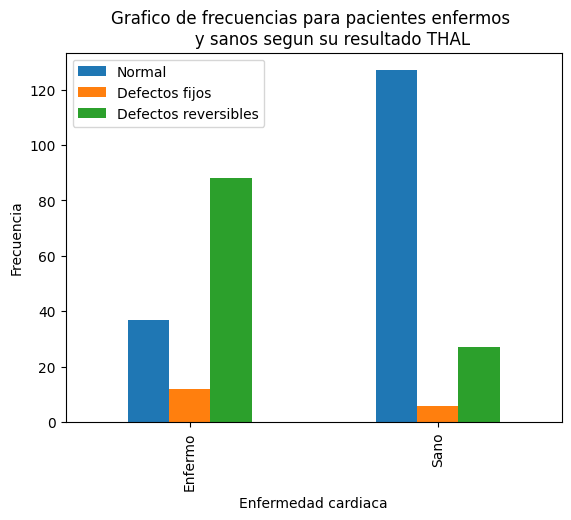

In [57]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["THAL"]).plot(kind="bar")
ax.legend(["Normal","Defectos fijos", "Defectos reversibles"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
       y sanos segun su resultado THAL""")

<center>Intervalos de Confianza al 95%</center>

In [68]:
#Extraer Datos
datosMaximaFrecuenciaCardiaca=heart_disease.loc[:,["ENFERMEDAD_CARD","MAX_HEART_R"]]
datosMaximaFrecuenciaCardiacaSano=datosMaximaFrecuenciaCardiaca[["ENFERMEDAD_CARD","MAX_HEART_R"]][datosMaximaFrecuenciaCardiaca["ENFERMEDAD_CARD"]=="Sano"]
datosMaximaFrecuenciaCardiacaEnfermo=datosMaximaFrecuenciaCardiaca[["ENFERMEDAD_CARD","MAX_HEART_R"]][datosMaximaFrecuenciaCardiaca["ENFERMEDAD_CARD"]=="Enfermo"]
datosColesterol=heart_disease.loc[:,["ENFERMEDAD_CARD","COLESTEROL"]]
datosColesterolSano=datosColesterol[["ENFERMEDAD_CARD","COLESTEROL"]][datosColesterol["ENFERMEDAD_CARD"]=="Sano"]
datosColesterolEnfermo=datosColesterol[["ENFERMEDAD_CARD","COLESTEROL"]][datosColesterol["ENFERMEDAD_CARD"]=="Enfermo"]
#Estadisticas
mediaMuestralFreqSano=datosMaximaFrecuenciaCardiacaSano["MAX_HEART_R"].mean()
mediaMuestralFreqEnfermo=datosMaximaFrecuenciaCardiacaEnfermo["MAX_HEART_R"].mean()
mediaMuestralColesterolSano=datosColesterolSano["COLESTEROL"].mean()
mediaMuestralColesterolEnfermo=datosColesterolEnfermo["COLESTEROL"].mean()
dfFreqSano=datosMaximaFrecuenciaCardiacaSano["MAX_HEART_R"].count()-1
dfFreqEnfermo=datosMaximaFrecuenciaCardiacaEnfermo["MAX_HEART_R"].count()-1
dfColesterolSano=datosColesterolSano["COLESTEROL"].count()-1
dfColesterolEnfermo=datosColesterolEnfermo["COLESTEROL"].count()-1
tFreqSano=t.ppf(1-0.0001/2,dfFreqSano,loc=0, scale=1)
tFreqEnfermo=t.ppf(1-0.0001/2,dfFreqEnfermo,loc=0, scale=1)
tColesterolSano=t.ppf(1-0.0001/2,dfColesterolSano,loc=0, scale=1)
tColesterolEnfermo=t.ppf(1-0.0001/2,dfColesterolEnfermo,loc=0, scale=1)
varianzaMuestralFreqSano=datosMaximaFrecuenciaCardiacaSano["MAX_HEART_R"].var()
varianzaMuestralFreqEnfermo=datosMaximaFrecuenciaCardiacaEnfermo["MAX_HEART_R"].var()
varianzaMuestralColesterolSano=datosColesterolSano["COLESTEROL"].var()
varianzaMuestralColesterolEnfermo=datosColesterolEnfermo["COLESTEROL"].var()
#Intervalos de confianza
upperICFreqSano=mediaMuestralFreqSano+tFreqSano*math.sqrt(varianzaMuestralFreqSano/(dfFreqSano+1))
lowerICFreqSano=mediaMuestralFreqSano-tFreqSano*math.sqrt(varianzaMuestralFreqSano/(dfFreqSano+1))
print("["+str(lowerICFreqSano)+", "+str(upperICFreqSano)+"]")
upperICFreqEnfermo=mediaMuestralFreqEnfermo+tFreqEnfermo*math.sqrt(varianzaMuestralFreqEnfermo/(dfFreqEnfermo+1))
lowerICFreqEnfermo=mediaMuestralFreqEnfermo-tFreqEnfermo*math.sqrt(varianzaMuestralFreqEnfermo/(dfFreqEnfermo+1))
print("["+str(lowerICFreqEnfermo)+", "+str(upperICFreqEnfermo)+"]")
upperICColesterolSano=mediaMuestralColesterolSano+tColesterolSano*math.sqrt(varianzaMuestralColesterolSano/(dfColesterolSano+1))
lowerICColesterolSano=mediaMuestralColesterolSano-tColesterolSano*math.sqrt(varianzaMuestralColesterolSano/(dfColesterolSano+1))
print("["+str(lowerICColesterolSano)+", "+str(upperICColesterolSano)+"]")
upperICColesterolEnfermo=mediaMuestralColesterolEnfermo+tColesterolEnfermo*math.sqrt(varianzaMuestralColesterolEnfermo/(dfColesterolEnfermo+1))
lowerICColesterolEnfermo=mediaMuestralColesterolEnfermo-tColesterolEnfermo*math.sqrt(varianzaMuestralColesterolEnfermo/(dfColesterolEnfermo+1))
print("["+str(lowerICColesterolEnfermo)+", "+str(upperICColesterolEnfermo)+"]")
#Graficos
scatterSano=go.Scatter(x=datosColesterolSano["COLESTEROL"], y=datosMaximaFrecuenciaCardiacaSano["MAX_HEART_R"], mode="markers", marker=dict(color="blue"), name="Saludables")
scatterEnfermo=go.Scatter(x=datosColesterolEnfermo["COLESTEROL"], y=datosMaximaFrecuenciaCardiacaEnfermo["MAX_HEART_R"], mode="markers", marker=dict(color="red"), name= "Enfermos")
layoutGraph1=go.Layout(title="Scatter de la Máxima Frecuencia Cardiaca y Colesterol", xaxis=dict(title="Colesterol [añadir unidades]"), yaxis=dict(title="Maxima Frecuencia Cardiaca [añadir unidades]"))
rectSano=go.Scatter(x=[lowerICColesterolSano, lowerICColesterolSano, upperICColesterolSano, upperICColesterolSano, lowerICColesterolSano], y=[lowerICFreqSano, upperICFreqSano, upperICFreqSano, lowerICFreqSano, lowerICFreqSano], fill="toself", name= "Valor Esperado Saludables")
rectEnfermo=go.Scatter(x=[lowerICColesterolEnfermo, lowerICColesterolEnfermo, upperICColesterolEnfermo, upperICColesterolEnfermo, lowerICColesterolEnfermo], y=[lowerICFreqEnfermo, upperICFreqEnfermo, upperICFreqEnfermo, lowerICFreqEnfermo, lowerICFreqEnfermo], fill="toself", name="Valor Esperado Enfermos")
graph1=go.Figure(data=[scatterSano, scatterEnfermo, rectSano, rectEnfermo], layout=layoutGraph1)
graph1.show()



[151.71049226092245, 165.45200773907757]
[130.20469690659672, 148.01428119559307]
[224.09821374281208, 262.8892862571879]
[232.37464878069449, 271.3333804163858]
